#Dataset info :

*   Features are labled v1 .. v28 due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
*   Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
*   The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
*   Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

*    **Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.**

*    [Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


#Import Dataset

In [44]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
)

<ipython-input-44-a70a1de08f0a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [45]:
df.dataframeName = 'creditcard.csv'

In [46]:
X = df.drop(columns = "Class")

In [47]:
Y = df["Class"]

In [48]:
feature_names = X.columns

# import libraries

In [6]:
# !pip install ydata_profiling

In [7]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
# from ydata_profiling import ProfileReport
import seaborn as sns

In [8]:
from google.colab import files
import os
from http.server import SimpleHTTPRequestHandler
from socketserver import TCPServer
import threading

In [9]:
from sklearn.feature_selection import (
    mutual_info_regression,  # Information Gain
    chi2,                    # Chi-square Test
    f_classif,               # ANOVA (F-test)
    SelectKBest,             # Select top k features
    VarianceThreshold        # Variance Threshold
)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             r2_score)

## Check for duplicates

In [14]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [15]:
df[df.duplicated()]["Class"]==1

,Class
33,False
35,False
113,False
114,False
115,False
...,...
282987,False
283483,False
283485,False
284191,False


In [16]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

In [17]:
df.drop(columns="index",axis=1,inplace=True)

In [18]:
df[df.duplicated()].shape

(0, 31)

## Models

## XGBoost

In [34]:
# # Oversampling
# from imblearn.over_sampling import RandomOverSampler
# X = df.drop("Class", axis=1)
# y = df["Class"]

# ros = RandomOverSampler(sampling_strategy={1: y.value_counts().max()}, random_state=42)
# X, y = ros.fit_resample(X, y)

In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.feature_selection import RFE
model = xgb.XGBClassifier(eval_metric=['logloss', 'auc','aucpr'],scale_pos_weight=596)

model = xgb.XGBClassifier(
    n_estimators=5000,
    learning_rate=0.01,
    subsample=0.8,
    max_depth=15,
    colsample_bytree=0.8,
    scale_pos_weight=596,
    eval_metric=['logloss', 'auc', 'aucpr'],
)

In [36]:
# Recursive Feature Elimination
X = df.drop(columns = "Class")
Y = df["Class"]
rfe = RFE(estimator=model, n_features_to_select=14)
rfe.fit(X, Y)
selected = X.columns[rfe.get_support()]
X = df[selected]
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [37]:
X.columns

Index(['Time', 'V4', 'V6', 'V8', 'V12', 'V13', 'V14', 'V17', 'V18', 'V19',
       'V20', 'V26', 'V27', 'Amount'],
      dtype='object')

In [38]:
# Evaluate the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# y_probs = model.predict_proba(X_test)[:, 1]
# y_pred = (y_probs >= 0.5).astype(int)  # Lower threshold

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.79      0.84        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Confusion Matrix:
[[56643     8]
 [   20    75]]


<Figure size 8000x4000 with 0 Axes>

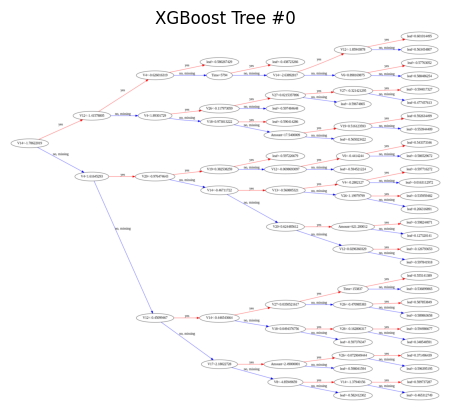

<Figure size 8000x4000 with 0 Axes>

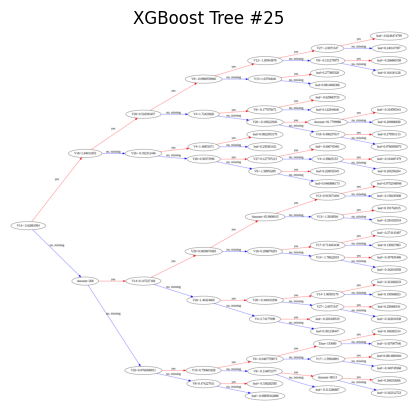

<Figure size 8000x4000 with 0 Axes>

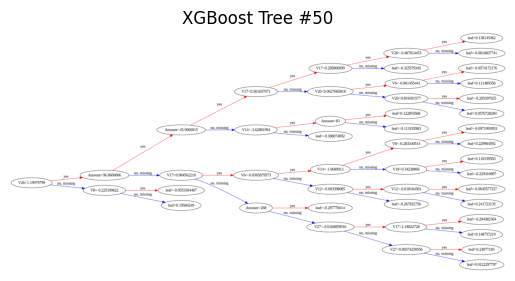

<Figure size 8000x4000 with 0 Axes>

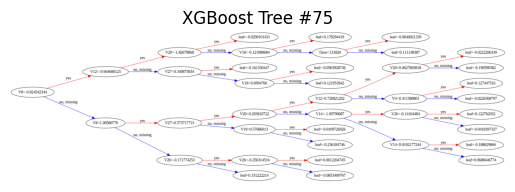

<Figure size 8000x4000 with 0 Axes>

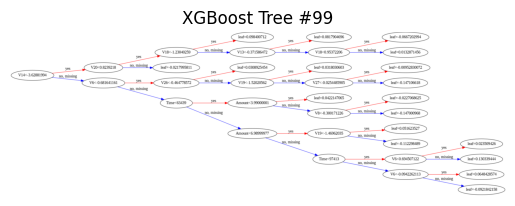

In [52]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Example: plot a few representative trees
tree_indices = [0, 25, 50, 75, 99]

for i in tree_indices:
    plt.figure(figsize=(80, 40))
    xgb.plot_tree(model, num_trees=i, rankdir='LR')
    plt.title(f"XGBoost Tree #{i}")
    plt.show()


In [40]:
!pip install -q alibi > /dev/null 2>&1

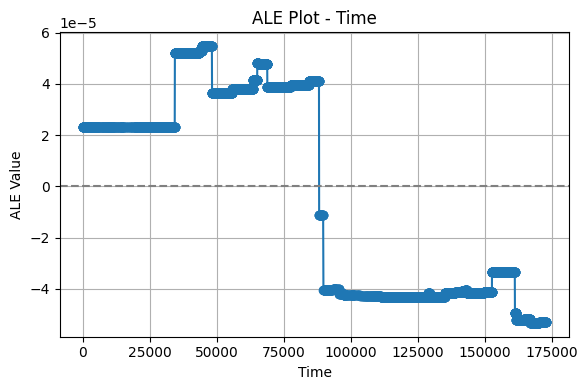

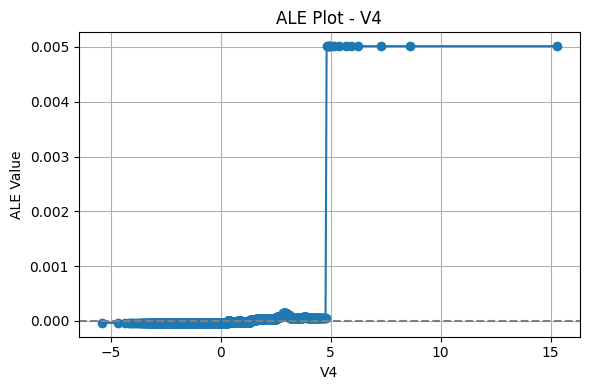

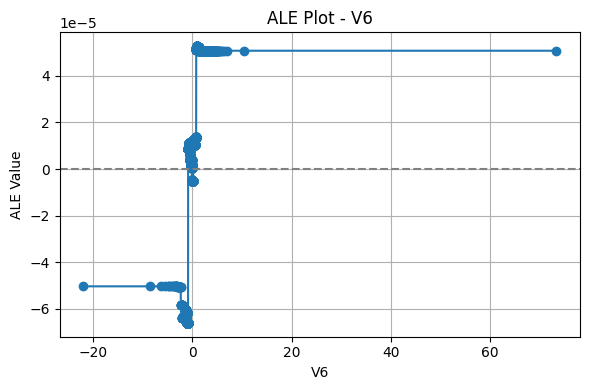

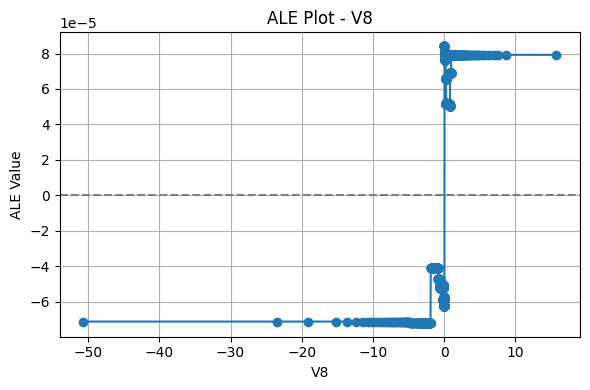

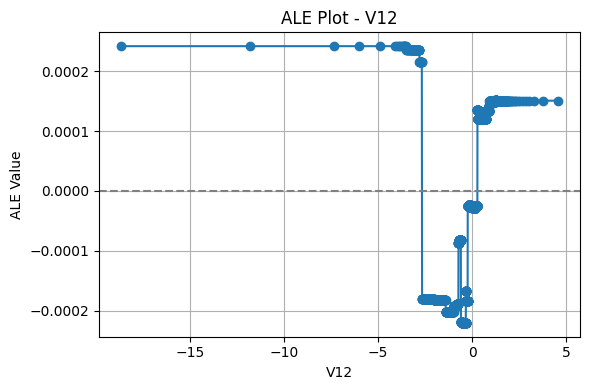

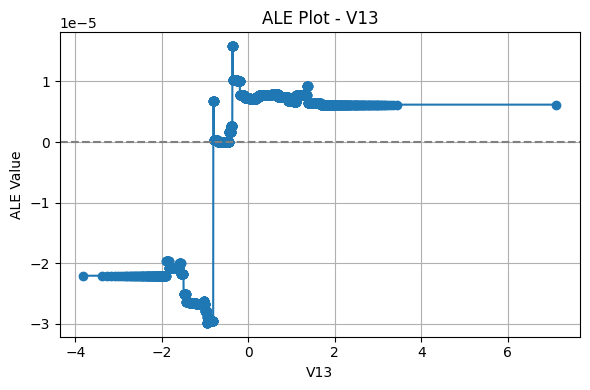

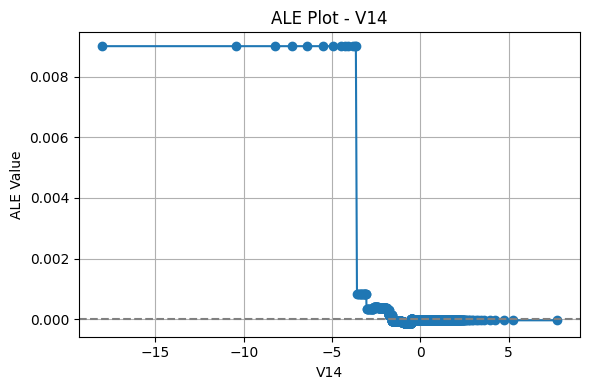

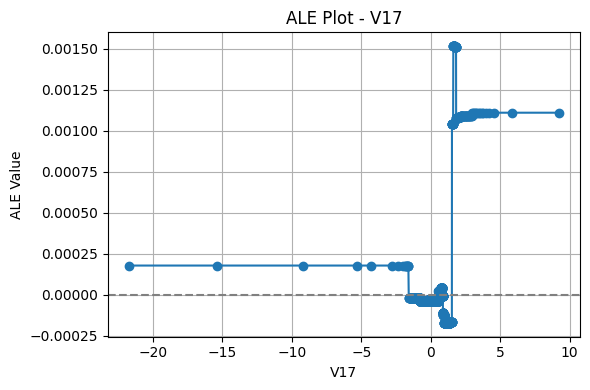

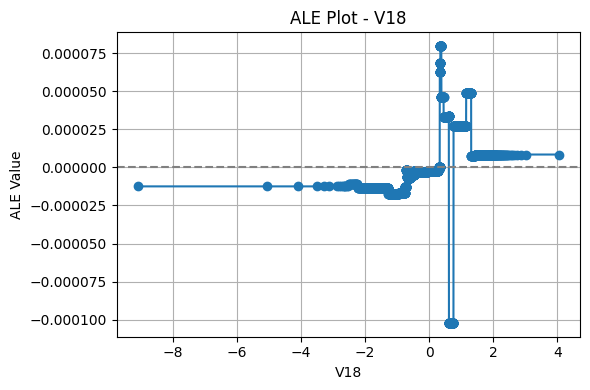

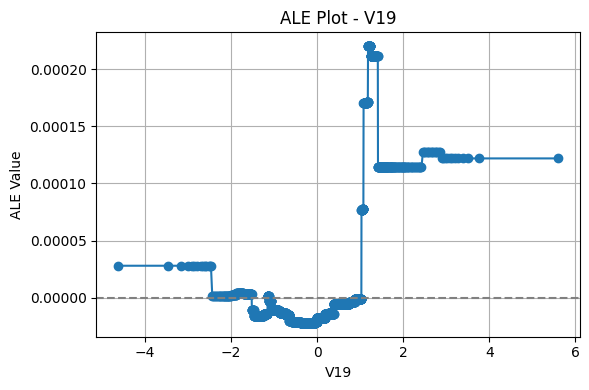

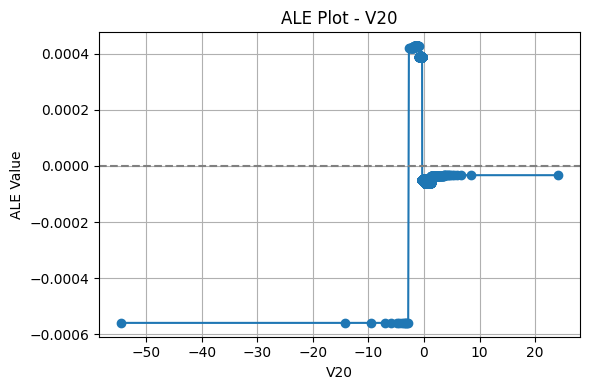

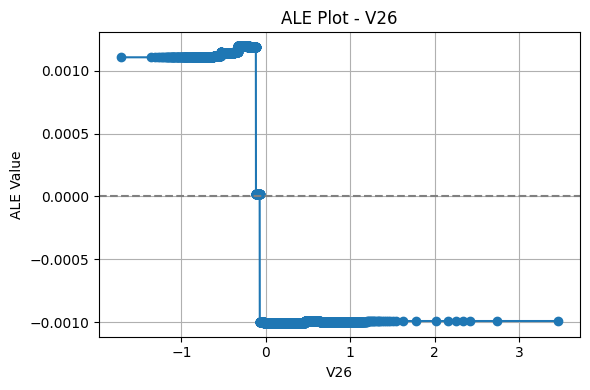

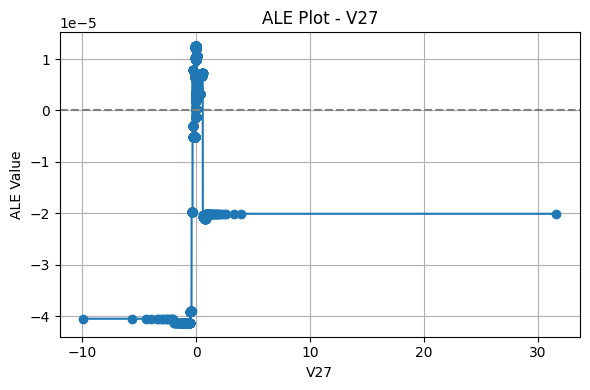

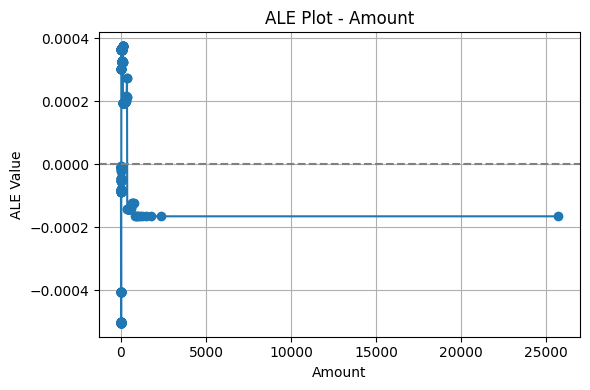

In [41]:
import matplotlib.pyplot as plt
from alibi.explainers import ALE

predict_fn = lambda x: model.predict_proba(x)[:, 1]

ale = ALE(predict_fn, feature_names=list(X.columns))
exp = ale.explain(X_test.values)

for i, feature in enumerate(X.columns):
    ale_vals = exp.ale_values[i]
    feature_vals = exp.feature_values[i]

    plt.figure(figsize=(6, 4))
    plt.plot(feature_vals, ale_vals, marker='o')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"ALE Plot - {feature}")
    plt.xlabel(feature)
    plt.ylabel("ALE Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


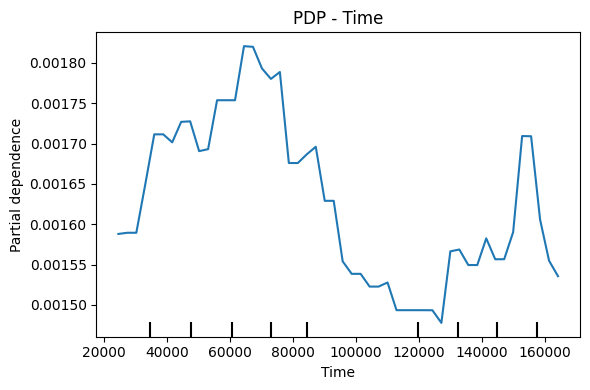

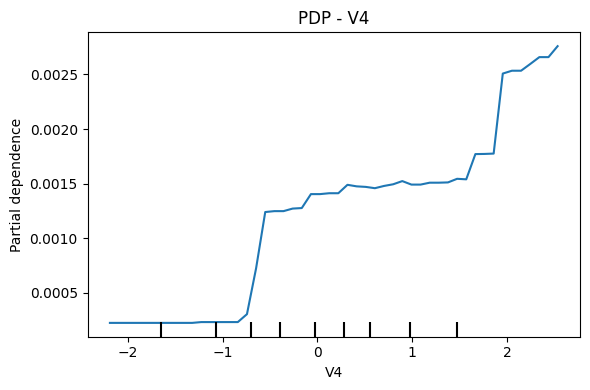

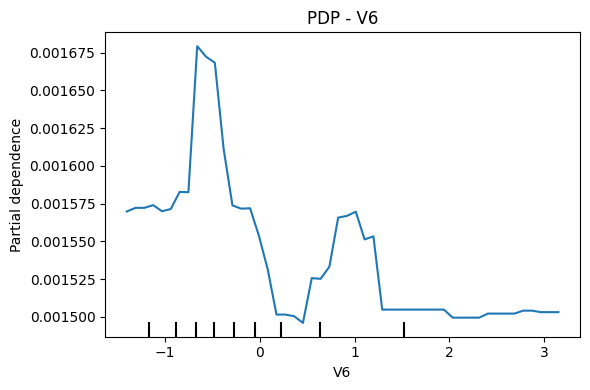

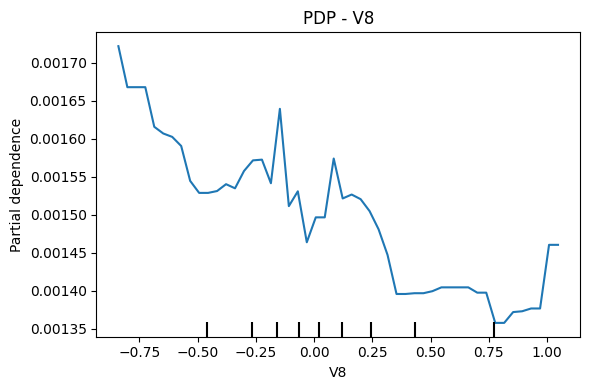

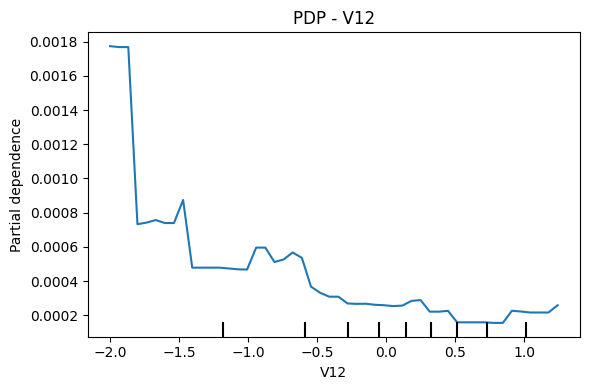

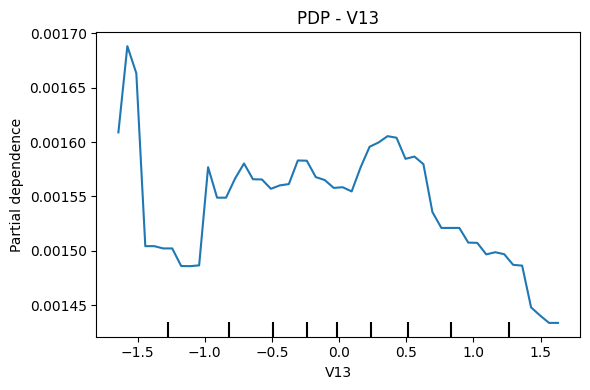

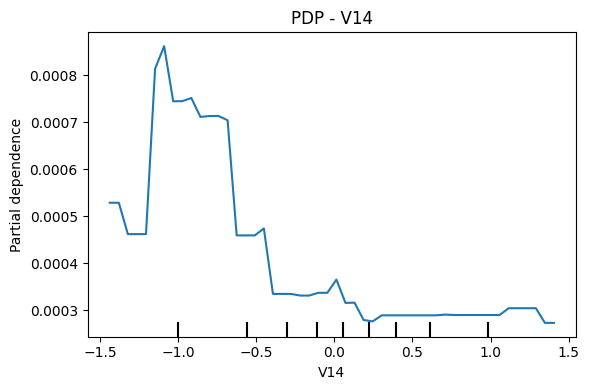

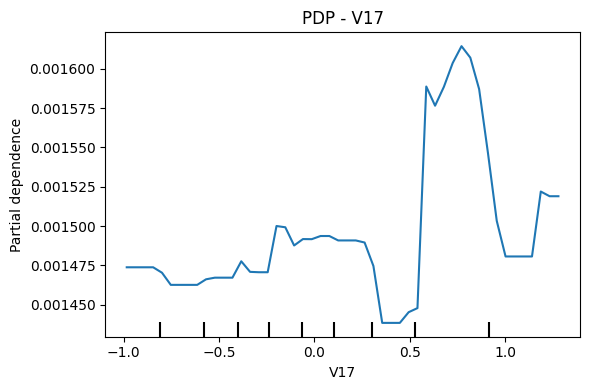

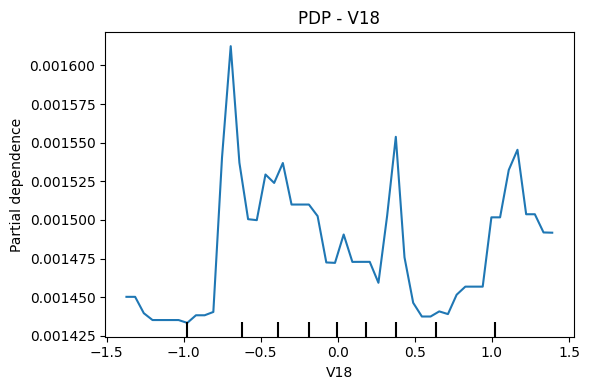

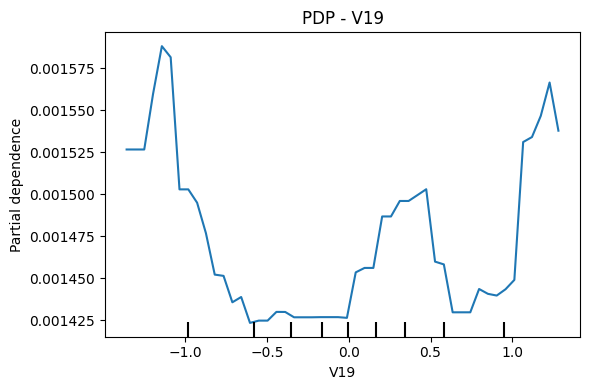

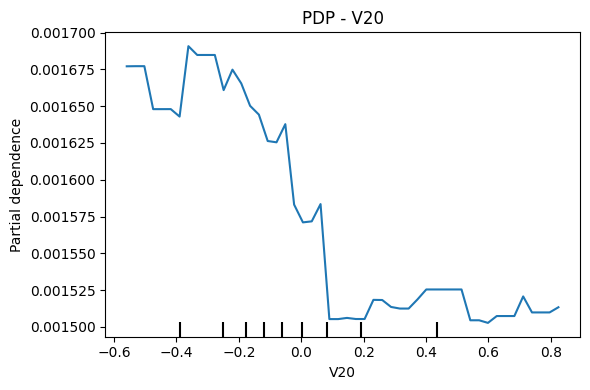

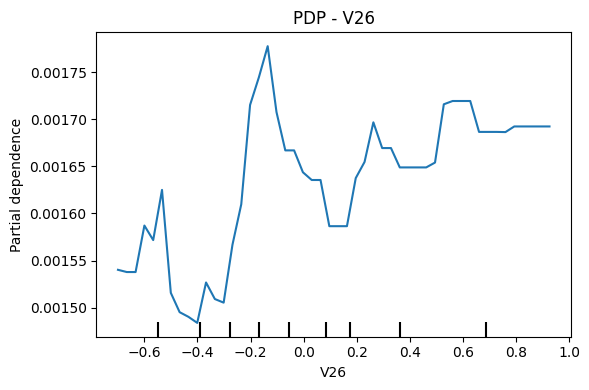

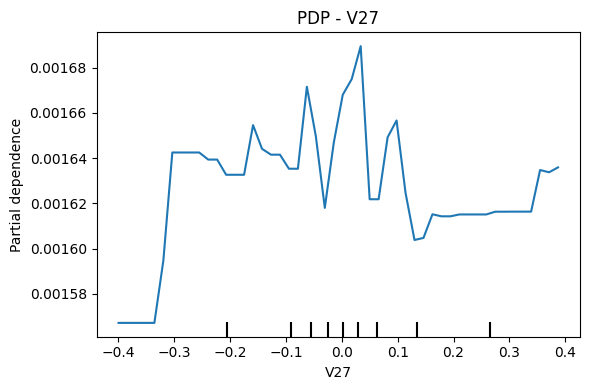

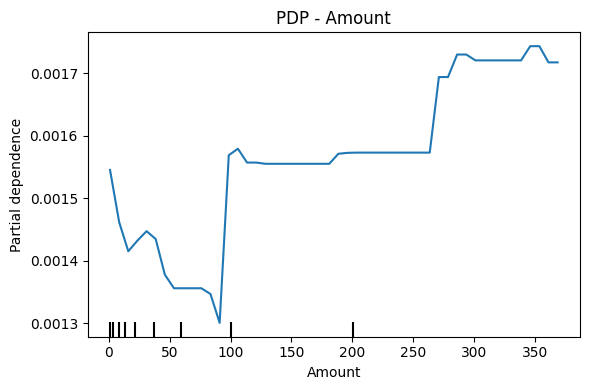

In [42]:
from sklearn.inspection import PartialDependenceDisplay

# Plot PDP for each selected feature
for i, feature in enumerate(X.columns):
    fig, ax = plt.subplots(figsize=(6, 4))
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_test,
        [feature],
        ax=ax,
        kind='average',  # ‘average’, ‘individual’ or ‘both’
        grid_resolution=50
    )
    ax.set_title(f"PDP - {feature}")
    plt.tight_layout()
    plt.show()
